In [1]:
from IPython.display import display,HTML
display(HTML("<style>.container {width:100% !import; }</style>"))

# Customer Retention use case
The factors that influence the online customers repeat purchase intention.Result indicate the e-retail success factors,which are very much critical for customer satisfaction.

# Data Description
Customer satisfaction has emerged as one of the important factors that contribute for the success of online store.Five major factors that contributed to the success of an e-commerce store have been identified as :service quality,system quality,information quality,trust and net benefit.
    The task is to train a e-retail success, which are very critical for customer satisfaction.

# Target 

Our target is variable class which contains  e-retail success factors, net benefit and repeated purchase of customer. 


# Important observation from data description 
1.As entire data is in the range of 1 to 5
2.there are 47 number of columns

In [2]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('customer_retention_dataset.csv', delimiter="\t", encoding='utf-8')
df.shape


(269, 71)

In [4]:
# We drop columns colno.1 Gender,colno.2 2How old are you? ,colno.3 2 How old are you? ,colno.42 How old are you? 

In [5]:
data_df= df.iloc[1:,:47]
#data_df.head(10)
data_df.head(10)



,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
1,1,2,Delhi,110030,5,5,2,1,2,3,...,5,5,5,5,3,3,3,5,5,5
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,4,5,5,5,4,4,4,3,3,4
3,0,2,Karnal,132001,4,1,3,1,4,3,...,4,4,4,5,4,4,5,4,3,4
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,5,4,4,5,4,3,1,5,1,5
5,1,3,Noida,201308,5,5,2,1,4,2,...,5,5,5,5,5,5,3,3,4,5
6,0,4,Delhi,110011,5,4,2,4,5,2,...,4,4,3,4,4,3,3,4,4,4
7,0,4,Delhi,110018,4,1,3,3,5,1,...,1,5,5,5,5,5,1,1,1,4
8,1,1,Solan,173229,3,1,2,1,4,2,...,5,5,4,4,4,4,3,3,4,3
9,1,3,Delhi,110039,1,1,2,2,5,1,...,4,4,4,4,4,4,3,3,3,4
10,0,3,Moradabad,244001,5,3,3,2,5,1,...,5,3,4,2,3,4,2,2,4,3


In [6]:
data_df.columns
data_df.shape
data_df.columns


Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [7]:
# We drop columns colno.1 Gender,colno.2 2How old are you? ,colno.3 2 How old are you? ,colno.42 How old are you?,4 What is the Pin Code of where you shop online from? which has no relation with e-retail success

In [8]:
data_df=data_df.drop(["1Gender of respondent"],axis=1)
data_df


,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
1,2,Delhi,110030,5,5,2,1,2,3,1,...,5,5,5,5,3,3,3,5,5,5
2,2,Greater Noida,201308,4,5,3,1,4,2,1,...,4,5,5,5,4,4,4,3,3,4
3,2,Karnal,132001,4,1,3,1,4,3,2,...,4,4,4,5,4,4,5,4,3,4
4,2,Bangalore,530068,3,2,2,1,2,3,2,...,5,4,4,5,4,3,1,5,1,5
5,3,Noida,201308,5,5,2,1,4,2,1,...,5,5,5,5,5,5,3,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2,Solan,173212,2,1,3,1,4,2,4,...,4,4,3,2,3,2,4,3,4,3
265,3,Ghaziabad,201008,2,4,3,1,5,2,1,...,5,5,5,5,5,5,5,5,5,5
266,4,Bangalore,560010,3,1,3,2,5,1,1,...,4,3,5,4,4,2,3,4,4,4
267,1,Solan,173229,3,1,2,1,4,2,1,...,5,5,4,4,4,4,3,3,4,3


In [9]:
#we select the class variables in data frame on which we are going to see the corelation between the variables

data_df = df.iloc[:, [5,23,26,27,34,36]]
data_df

,6 How many times you have made an online purchase in the past 1 year?,24 User friendly Interface of the website,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,35 Displaying quality Information on the website improves satisfaction of customers,37 Net Benefit derived from shopping online can lead to users satisfaction
0,4,2,5,4,3,4
1,5,5,5,5,5,5
2,5,5,5,5,5,5
3,1,5,5,5,3,3
4,2,5,5,4,4,5
...,...,...,...,...,...,...
264,1,4,4,4,3,3
265,4,5,5,5,5,5
266,1,4,3,3,4,4
267,1,5,5,5,5,5


In [10]:
data_df.columns

Index(['6 How many times you have made an online purchase in the past 1 year?',
       '24 User friendly Interface of the website',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guarantee the privacy of the customer',
       '35 Displaying quality Information on the website improves satisfaction of customers',
       '37 Net Benefit derived from shopping online can lead to users satisfaction'],
      dtype='object')

About the Columns:
    
    1. (column no.6)How many times you have made an online purchase in the past 1 year:
        This Column Shows that how many times customer did the online purchase
    
    2. (column no.24) User friendly Interface of the website:
        This Column shows that system quality rating.How user friendly the website is for customer.
    
    3. (column no.27) Empathy (readiness to assist with queries) towards the customers:
        This Column shows that service quality provided to the customer.i.e.rating for customer queries resoluation.
    
    4. (column no.28) Being able to guarantee the privacy of the customer:
        This Column shows the trust the customer will do on the website while purchasing any product.
    
    5. (column no.35) Displaying quality Information on the website improves satisfaction of customers:
        This column shows the information quality i.e. information about the product how much the information about the products on the web site is reliable in context of quality,material,price,value for money.
        
    7. (column no. 37)Net Benefit derived from shopping online can lead to users satisfaction:
        This column shows the rating for customer satisfaction for purchasing the products from the website.The maximum purchase rating ie.maximum sale .This is our Outcome Variable class.
        

In [11]:
#Check is there any null value present in our DataFrame
data_df.isnull().sum()

6 How many times you have made an online purchase in the past 1 year?                  0
24 User friendly Interface of the website                                              0
27 Empathy (readiness to assist with queries) towards the customers                    0
28 Being able to guarantee the privacy of the customer                                 0
35 Displaying quality Information on the website improves satisfaction of customers    0
37 Net Benefit derived from shopping online can lead to users satisfaction             0
dtype: int64

In our Dataframe there no column present that has null value.

# EDA

BarPlot:(1) Bar plot the User friendly Interface of the website with the Outcome i.e.Net Benefit derived from shopping online can lead to users satisfaction.
    

In [12]:
data_df

,6 How many times you have made an online purchase in the past 1 year?,24 User friendly Interface of the website,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,35 Displaying quality Information on the website improves satisfaction of customers,37 Net Benefit derived from shopping online can lead to users satisfaction
0,4,2,5,4,3,4
1,5,5,5,5,5,5
2,5,5,5,5,5,5
3,1,5,5,5,3,3
4,2,5,5,4,4,5
...,...,...,...,...,...,...
264,1,4,4,4,3,3
265,4,5,5,5,5,5
266,1,4,3,3,4,4
267,1,5,5,5,5,5


In [13]:
#Remaning the Columns

data_df.rename(columns = {'6 How many times you have made an online purchase in the past 1 year?':'RepeatPurchase(in_last_1YR)'}, inplace = True)
data_df.rename(columns = {'24 User friendly Interface of the website':'System Quality'}, inplace = True)
data_df.rename(columns = {'27 Empathy (readiness to assist with queries) towards the customers':'Service Quality'}, inplace = True)
data_df.rename(columns = {'28 Being able to guarantee the privacy of the customer':'Customer Trust'}, inplace = True)
data_df.rename(columns = {'35 Displaying quality Information on the website improves satisfaction of customers':'Information Quality'}, inplace = True)
data_df.rename(columns = {'37 Net Benefit derived from shopping online can lead to users satisfaction':'Outcome(User satisfaction)'}, inplace = True)

data_df

,RepeatPurchase(in_last_1YR),System Quality,Service Quality,Customer Trust,Information Quality,Outcome(User satisfaction)
0,4,2,5,4,3,4
1,5,5,5,5,5,5
2,5,5,5,5,5,5
3,1,5,5,5,3,3
4,2,5,5,4,4,5
...,...,...,...,...,...,...
264,1,4,4,4,3,3
265,4,5,5,5,5,5
266,1,4,3,3,4,4
267,1,5,5,5,5,5


<AxesSubplot:>

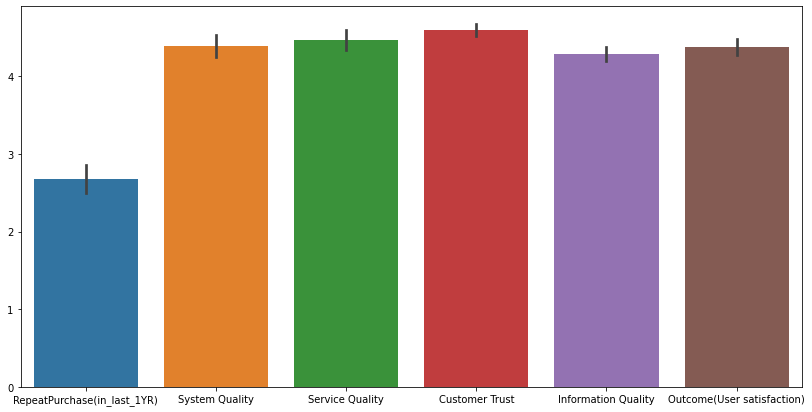

In [16]:
import seaborn as sns
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data = data_df)

We can see the RepeatPurchase is equally distributed in the range of 0 to 2.8

We can see the System Quality is equally distributed in the range of 0 to 4.2

We can see the ServiceQuality is equally distributed in the range of 0 to 4.3

We can see the Customer Trust is equally distributed in the range of 0 to 4.5

We can see the Information Quality is equally distributed in the range of 0 to 4.1

We can see the Outcome is equally distributed in the range of 0 to 4.4


We can see the User satisfaction is equally distributed with System Quality,Service Quality,Customer Trust,Information Quality.
The Sale maximization is online purchase is highly depend on Customer Trust.If website guarantee the privacy of the customer is given then Sale can be maximize.4.5

After Customer Trust,Serive Quality contribute to the success of e-purchase and sale maximization.

We can see that User satisfaction is dependency on SystemQuality,Service Quality,CustomerTrust,Information Quality.

[[Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Flipkart.com'),
  Text(2, 0, 'Paytm.com'),
  Text(3, 0, 'Myntra.com'),
  Text(4, 0, 'Snapdeal.com')]]

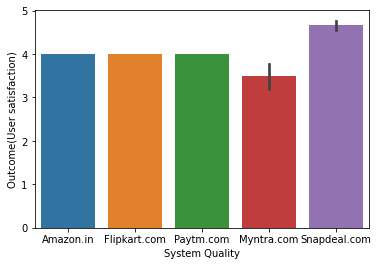

In [25]:
import seaborn as sns
g=sns.barplot( x='System Quality', y='Outcome(User satisfaction)',data = data_df)
g.set(xticklabels=["Amazon.in", "Flipkart.com", "Paytm.com", "Myntra.com", "Snapdeal.com"])

We can see in above fig the Snapdeal.com website has highest System Quality that maximaize the sales and Customer satisfaction

[[Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Flipkart.com'),
  Text(2, 0, 'Paytm.com'),
  Text(3, 0, 'Myntra.com')]]

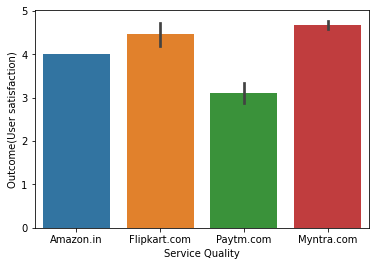

In [35]:
import seaborn as sns
g=sns.barplot( x='Service Quality', y='Outcome(User satisfaction)',data = data_df)
g.set(xticklabels=["Amazon.in", "Flipkart.com", "Paytm.com", "Myntra.com"])

In [ ]:
We can see that Service Quality is equally distributed from 0 to 4.2
Myntra.com provide highest Service Quality.

[[Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Flipkart.com'),
  Text(2, 0, 'Paytm.com')]]

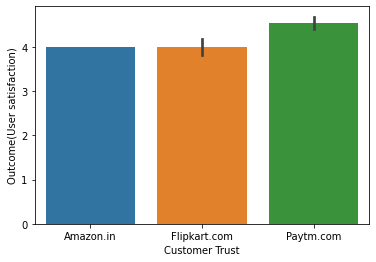

In [30]:
import seaborn as sns
g=sns.barplot( x='Customer Trust', y='Outcome(User satisfaction)',data = data_df)
g.set(xticklabels=["Amazon.in", "Flipkart.com", "Paytm.com"])

We can see in above fig. Paytm.com gives highest customer privacy. It is  which equally distributed from range 0 to 4.5.  

[[Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Flipkart.com'),
  Text(2, 0, 'Paytm.com')]]

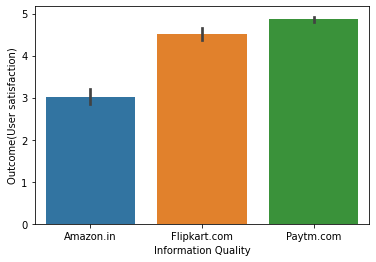

In [32]:
import seaborn as sns
g=sns.barplot( x='Information Quality', y='Outcome(User satisfaction)',data = data_df)
g.set(xticklabels=["Amazon.in", "Flipkart.com","Paytm.com"])

In [ ]:
We can see in above fig. Paytm.com has highest rating that means it provide relaible information about the product to the customer who is inerested to do the e purchase from web site.
We can see that Information Quality is equally distributed in the ranges from 0 to 4.1

amazon is at lowest rating which ranges from 0 to 3

[[Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Flipkart.com'),
  Text(2, 0, 'Paytm.com'),
  Text(3, 0, 'Myntra.com')]]

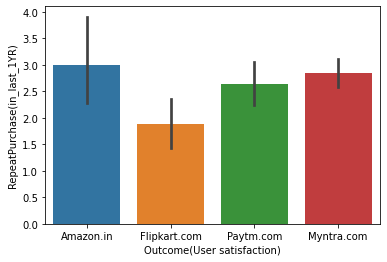

In [34]:
import seaborn as sns
g=sns.barplot( x='Outcome(User satisfaction)', y='RepeatPurchase(in_last_1YR)',data = data_df)
g.set(xticklabels=["Amazon.in", "Flipkart.com","Paytm.com","Myntra.com"])

We can see The Customer did maximum repeated purchase on Amazon.
We can see the Outcome(User_satisfaction) is equally distributed with in th range of 0 to 3.0

# Correlation

In [39]:
data_df.corr()

,RepeatPurchase(in_last_1YR),System Quality,Service Quality,Customer Trust,Information Quality,Outcome(User satisfaction)
RepeatPurchase(in_last_1YR),1.000000,-0.056977,0.016499,0.058167,0.200884,0.138967
System Quality,-0.056977,1.000000,0.804179,0.769106,0.120599,0.307984
Service Quality,0.016499,0.804179,1.000000,0.774033,-0.051541,0.303216
Customer Trust,0.058167,0.769106,0.774033,1.000000,0.110799,0.266504
Information Quality,0.200884,0.120599,-0.051541,0.110799,1.000000,0.753178
Outcome(User satisfaction),0.138967,0.307984,0.303216,0.266504,0.753178,1.000000


<AxesSubplot:>

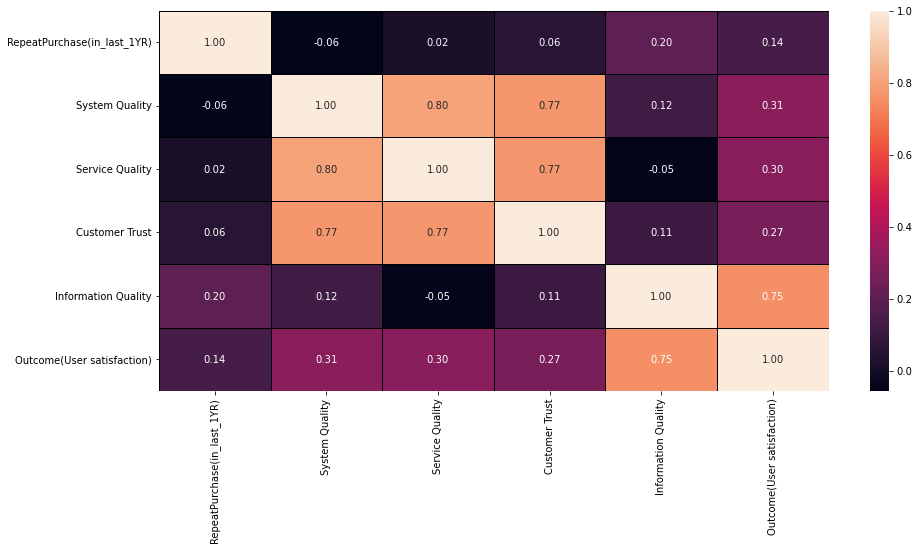

In [41]:
#Correlation using heatmap:
plt.figure(figsize=(15,7))
sns.heatmap(data_df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

OutCome of Correlation:
    
    All the Columns of dataset is positively correlated with the target column.
    Max col :Customer Trust
    Min col :RepeatPurchase(in_last_1YR)

# Describing Dataset

In [48]:
data_df.describe()

,RepeatPurchase(in_last_1YR),System Quality,Service Quality,Customer Trust,Information Quality,Outcome(User satisfaction)
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,2.672862,4.394052,4.464684,4.591078,4.286245,4.379182
std,1.651788,1.162586,1.080551,0.660785,0.789292,0.883775
min,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000
25%,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,2.000000,5.000000,5.000000,5.000000,4.000000,5.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


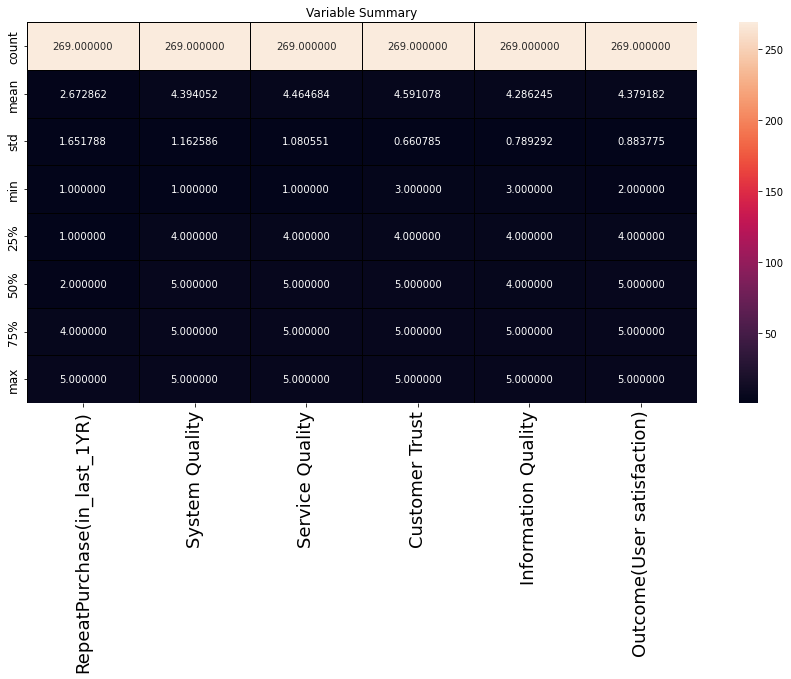

In [49]:
plt.figure(figsize=(15,7))
sns.heatmap(data_df.describe(),annot=True,linewidth=0.5,linecolor="black",fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

# Outcome of describe of dataset:
    From the above plotting we are determing mean,standard deviation,minimum and maximum value of each column.It help us further in data cleaning.
    1.269 rows
    2.6 cloumns
    
    RepeatPurchase(in_last_1YR):
        1. Mean = 2.672862	
        2. std = 1.651788	
        3. max_value = 5.000000	
        4. min_value = 1.000000	
    
    System Quality:
        1. Mean = 4.394052
        2. std = 1.162586	
        3. max_value = 5.000000	
        4. min_value = 1.000000
    
    Service Quality:
        1. Mean = 4.464684	
        2. std = 1.080551	
        3. max_value = 5.000000	
        4. min_value =  1.000000
    
    Customer Trust:
        1. Mean = 4.591078	
        2. std = 0.660785
        3. max_value = 5.000000	
        4. min_value =3.000000 
    
    Information Quality:
        1. Mean = 4.286245	
        2. std = 0.789292	
        3. max_value = 5.000000
        4. min_value = 3.000000	
    
    Outcome (User satisfaction):
        1. Mean = 4.379182
        2. std = 0.883775
        3. max_value = 5.000000
        4. min_value = 2.000000
    

In [52]:
data_df['Outcome(User satisfaction)'].unique()

array([4, 5, 3, 2], dtype=int64)

In [53]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   RepeatPurchase(in_last_1YR)  269 non-null    int64
 1   System Quality               269 non-null    int64
 2   Service Quality              269 non-null    int64
 3   Customer Trust               269 non-null    int64
 4   Information Quality          269 non-null    int64
 5   Outcome(User satisfaction)   269 non-null    int64
dtypes: int64(6)
memory usage: 12.7 KB


From above code we have to columns datatypes and memeory used by dataframe.

# Outliers Checking:

<AxesSubplot:xlabel='RepeatPurchase(in_last_1YR)', ylabel='Outcome(User satisfaction)'>

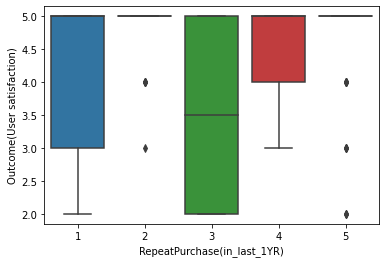

In [77]:
sns.boxplot(data=data_df, x="RepeatPurchase(in_last_1YR)", y="Outcome(User satisfaction)", dodge=False)

<AxesSubplot:xlabel='System Quality', ylabel='Outcome(User satisfaction)'>

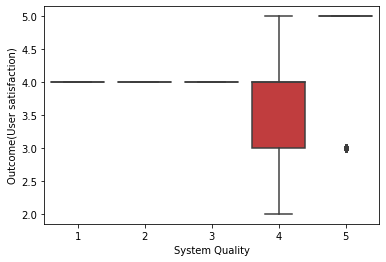

In [76]:
sns.boxplot(data=data_df, x="System Quality", y="Outcome(User satisfaction)", dodge=False)

<AxesSubplot:xlabel='Service Quality', ylabel='Outcome(User satisfaction)'>

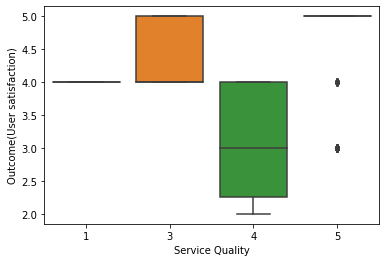

In [79]:
sns.boxplot(data=data_df, x="Service Quality", y="Outcome(User satisfaction)", dodge=False)

<AxesSubplot:xlabel='Customer Trust', ylabel='Outcome(User satisfaction)'>

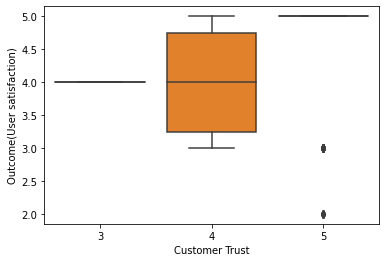

In [80]:
sns.boxplot(data=data_df, x="Customer Trust", y="Outcome(User satisfaction)", dodge=False)

<AxesSubplot:xlabel='Information Quality', ylabel='Outcome(User satisfaction)'>

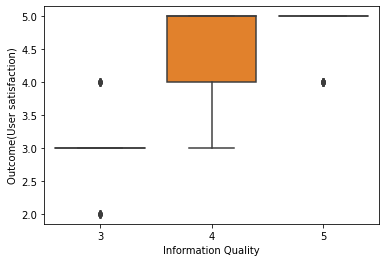

In [81]:
sns.boxplot(data=data_df, x="Information Quality", y="Outcome(User satisfaction)", dodge=False)

<AxesSubplot:xlabel='Outcome(User satisfaction)', ylabel='RepeatPurchase(in_last_1YR)'>

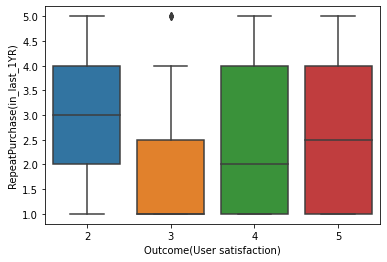

In [83]:
sns.boxplot(data=data_df, x="Outcome(User satisfaction)", y="RepeatPurchase(in_last_1YR)", dodge=False)

From the above outcome we can see that columns['RepeatPurchase(in_last_1YR)'] has maximum outliers
columns['System Quality', 'Service Quality',
       'Customer Trust', 'Information Quality']has less outliers 
and Outcome(User satisfaction) has min outliers.

# Skewness:

In [84]:
data_df.skew()

RepeatPurchase(in_last_1YR)    0.227755
System Quality                -2.015996
Service Quality               -2.294982
Customer Trust                -1.355737
Information Quality           -0.555681
Outcome(User satisfaction)    -1.180598
dtype: float64

Outcome of the skewness:Skewness threshold is taken is -1.10.Columns which are having skewnwss:
System Quality                
Service Quality               
Customer Trust                
Information Quality           
Outcome(User satisfaction)

# Normal Distribution Curve

<AxesSubplot:xlabel='RepeatPurchase(in_last_1YR)', ylabel='Density'>

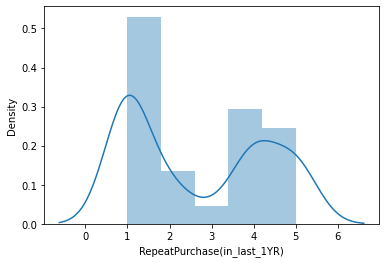

In [85]:
sns.distplot(data_df["RepeatPurchase(in_last_1YR)"])

The data of the column is not normalised .The bulding blocks is out of the normalised curve.

<AxesSubplot:xlabel='System Quality', ylabel='Density'>

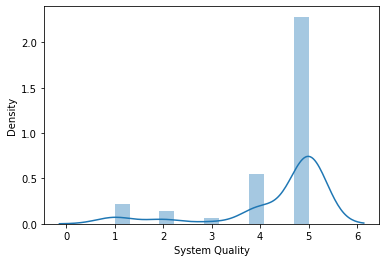

In [87]:
sns.distplot(data_df["System Quality"])

The data of the column is not normalised .The bulding blocks is out of the normalised curve.

<AxesSubplot:xlabel='Service Quality', ylabel='Density'>

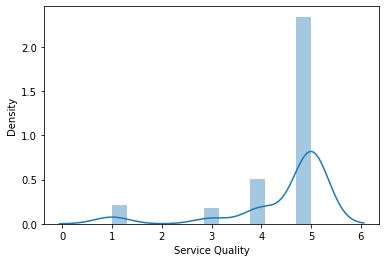

In [88]:
sns.distplot(data_df["Service Quality"])

The data of the column is not normalised .The bulding blocks is out of the normalised curve.

<AxesSubplot:xlabel='Customer Trust', ylabel='Density'>

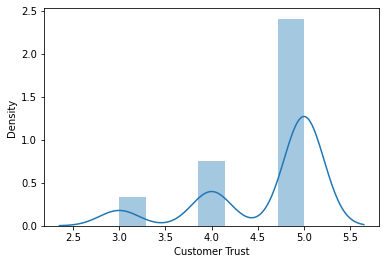

In [89]:
sns.distplot(data_df["Customer Trust"])

The data of the column is not normalised .The bulding blocks is out of the normalised curve.

<AxesSubplot:xlabel='Information Quality', ylabel='Density'>

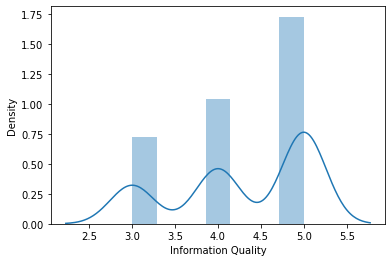

In [90]:
sns.distplot(data_df["Information Quality"])

The data of the column is not normalised .The bulding blocks is out of the normalised curve.



<AxesSubplot:xlabel='Outcome(User satisfaction)', ylabel='Density'>

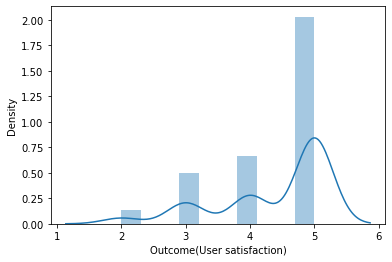

In [91]:
sns.distplot(data_df["Outcome(User satisfaction)"])

The data of the column is not normalised .The bulding blocks is out of the normalised curve. The normal distribution curve of Outcome is irrelevant.


The normal distribution shows that the data is skewed

In [92]:
cleandata_df = data_df.drop(["RepeatPurchase(in_last_1YR)"],axis=1)

In [93]:
cleandata_df

,System Quality,Service Quality,Customer Trust,Information Quality,Outcome(User satisfaction)
0,2,5,4,3,4
1,5,5,5,5,5
2,5,5,5,5,5
3,5,5,5,3,3
4,5,5,4,4,5
...,...,...,...,...,...
264,4,4,4,3,3
265,5,5,5,5,5
266,4,3,3,4,4
267,5,5,5,5,5


In [95]:
cleandata_df.shape

(269, 5)

Dividing data in features and vectors

# Removing Outliers:

Z-Score technique:
    

In [125]:
x = cleandata_df.iloc[:,:-1]
y = cleandata_df.iloc[:,-1]

In [137]:
x

,System Quality,Service Quality,Customer Trust,Information Quality
0,2,5,4,3
1,5,5,5,5
2,5,5,5,5
3,5,5,5,3
4,5,5,4,4
...,...,...,...,...
264,4,4,4,3
265,5,5,5,5
266,4,3,3,4
267,5,5,5,5


In [138]:
y

0      4
1      5
2      5
3      3
4      5
      ..
264    3
265    5
266    4
267    5
268    5
Name: Outcome(User satisfaction), Length: 269, dtype: int64

In [139]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(x))
z.shape

(269, 4)

In [140]:
threshold = 3
print(np.where(z>3))

(array([  7,  21,  38,  52,  53,  64,  65,  70, 110, 131, 143, 156, 157,
       158, 231, 232, 233, 263], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [ ]:
x=x[(z<3).all(axis=1)]

In [146]:
df_new1=cleandata_df[(z<3).all(axis=1)]
print(cleandata_df.shape)
print(df_new1.shape)

(269, 5)
(251, 5)


In [143]:
y = y[(z<3).all(axis=1)]
y.shape

(251,)

# Percentage data loss:

In [145]:
loss_percentage = (269-251)/269*100
print(loss_percentage)

6.691449814126393


In [ ]:
Checking wheather how much outliers are still there.If the outiers there help in the testing the model or not.
Model Without Outliers is data_df
Model with desired outliers is df_new1

# Transforming data to remove skewness:

In [147]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [148]:
x

array([[-2.02012417,  0.60698106, -1.35756022, -1.48233964],
       [ 0.62869651,  0.60698106,  0.67049637,  0.95611238],
       [ 0.62869651,  0.60698106,  0.67049637,  0.95611238],
       ...,
       [-1.07320007, -1.89347504, -1.74243596, -0.55189908],
       [ 0.62869651,  0.60698106,  0.67049637,  0.95611238],
       [ 0.62869651,  0.60698106,  0.67049637, -0.55189908]])

In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-2.02012417,  0.60698106, -1.35756022, -1.48233964],
       [ 0.62869651,  0.60698106,  0.67049637,  0.95611238],
       [ 0.62869651,  0.60698106,  0.67049637,  0.95611238],
       ...,
       [-1.07320007, -1.89347504, -1.74243596, -0.55189908],
       [ 0.62869651,  0.60698106,  0.67049637,  0.95611238],
       [ 0.62869651,  0.60698106,  0.67049637, -0.55189908]])

In [160]:
#Oversamping the data
from imblearn.over_sampling import SMOTE
#SM = SMOTE()
#from imblearn.over_sampling import SMOTESM = SMOTE()
#x,y = SM.fit_resample(x,y)

ModuleNotFoundError: No module named 'imblearn'

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

# Splitting the dataframe:
    

In [166]:
x = df_new1.iloc[:,:-1]
x.shape

(251, 4)

In [167]:
y.shape

(251,)

In [170]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The Model perofms very well")
        print("At random_state:-",i)
        print("Training_accuracy is :-",accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 1 The Model perofms very well
At random_state:- 1
Training_accuracy is :- 100.0
Testing r2_score is:- 100.0
At random state 3 The Model perofms very well
At random_state:- 3
Training_accuracy is :- 100.0
Testing r2_score is:- 100.0
At random state 4 The Model perofms very well
At random_state:- 4
Training_accuracy is :- 100.0
Testing r2_score is:- 100.0
At random state 5 The Model perofms very well
At random_state:- 5
Training_accuracy is :- 100.0
Testing r2_score is:- 100.0
At random state 7 The Model perofms very well
At random_state:- 7
Training_accuracy is :- 100.0
Testing r2_score is:- 100.0
At random state 8 The Model perofms very well
At random_state:- 8
Training_accuracy is :- 100.0
Testing r2_score is:- 100.0
At random state 11 The Model perofms very well
At random_state:- 11
Training_accuracy is :- 100.0
Testing r2_score is:- 100.0
At random state 13 The Model perofms very well
At random_state:- 13
Training_accuracy is :- 100.0
Testing r2_score is:- 100.0
At r

In [176]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=899)

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         6
           4       0.33      0.11      0.17         9
           5       0.61      0.74      0.67        31

    accuracy                           0.47        51
   macro avg       0.23      0.21      0.21        51
weighted avg       0.43      0.47      0.43        51



# Cross validation score for logistic regression:

In [179]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:",j)
    print("Cross Validation score is:-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv: 2
Cross Validation score is:- 97.20952380952382
accuracy_score is :- 96.07843137254902


At cv: 3
Cross Validation score is:- 97.60948556129279
accuracy_score is :- 96.07843137254902


At cv: 4
Cross Validation score is:- 97.20942140296978
accuracy_score is :- 96.07843137254902


At cv: 5
Cross Validation score is:- 95.59999999999998
accuracy_score is :- 96.07843137254902


At cv: 6
Cross Validation score is:- 97.59969028261712
accuracy_score is :- 96.07843137254902


At cv: 7
Cross Validation score is:- 97.99319727891157
accuracy_score is :- 96.07843137254902


At cv: 8
Cross Validation score is:- 97.60584677419355
accuracy_score is :- 96.07843137254902


At cv: 9
Cross Validation score is:- 97.5896531452087
accuracy_score is :- 96.07843137254902




since cross validation score accuracy score are almost same.We are heading with a good approch.

In [182]:
lssscore_selected = cross_val_score(lr,x,y,cv=7).mean()
print("The cv score is: ",lssscore_selected,"\nThe accuracy score is:",lss)

The cv score is:  0.9799319727891156 
The accuracy score is: 0.9607843137254902


In [183]:
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

1.0
[[ 5  0  0  0]
 [ 0  6  0  0]
 [ 0  0  9  0]
 [ 0  0  0 31]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        31

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [186]:
score =cross_val_score(RFC,x,y,cv=7)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)-score.mean())

[1. 1. 1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is -  0.0


In [187]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[ 5  0  0  0]
 [ 0  6  0  0]
 [ 0  0  9  0]
 [ 0  0  0 31]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        31

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [188]:
#Checking cv score for support vector machine classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predsvc)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is - 0.0


In [189]:
#checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

1.0
[[ 5  0  0  0]
 [ 0  6  0  0]
 [ 0  0  9  0]
 [ 0  0  0 31]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        31

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [190]:
#Checking cv score for support vector machine classifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predGB)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is - 0.0


# AUC ROC Curve:

In [192]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange',lw=10,lable='Roc Curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color ='navy',lw=10,linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Position Rate')
plt.ylabel('True Position Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported